# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [2]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'west'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [3]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [4]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: west
step 1 - action: north
step 2 - action: south
step 3 - action: east
step 4 - action: south
step 5 - action: east
step 6 - action: south
step 7 - action: south
step 8 - action: suck
step 9 - action: south
step 10 - action: west
step 11 - action: west
step 12 - action: east
step 13 - action: south
step 14 - action: north
step 15 - action: north
step 16 - action: suck
step 17 - action: north
step 18 - action: north
step 19 - action: suck


3

# Tasks - Corey Ellis

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

# Task 1 - Answer

The simulation enviornment accepts the same variables as the simple enviornment. The initial coordinates of the agent are then set using the random choice function. The enviornment is also created using the random choice function. Weights were added to the function make each square have a 20% chance of being labeled dirty (indicated by True when dirty and False when clean). Using the coordinates of the location for the agent will inform the agent of the percepts needed to govern the actions of the agent. Each action will update the percepts and add 1 to the performance measure that indicates the number of steps taken. The number of dirty squares in the enviornment is held in the variable 'dirtySquares'.

The enviornment accepts the size and creates a 2-dimensional array in order to simulate the room. The 'max_steps' parameter limits the performance of the agent to a maximimum step size that ends the simulation if the room is not cleaned by the time the number of maximum steps is reached. In order to update the percepts there is a series of if-statements to inform the bumpers of there actual values.

In [5]:
def simulation_enviornment(agent, max_steps, size, verbose = False):
    x_location = np.random.choice(size-1)
    y_location = np.random.choice(size-1)
    performance = 0
    
    bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}
    enviornment = np.random.choice([True, False], size = (size,size), p=[0.2,0.8]) #Creates The Initial Room
    
    dirtySquares = np.sum(enviornment)
    
    steps = 0
    while ((dirtySquares > 0) and (performance < max_steps)):
        bumpers["north"] = True if (y_location == 0) else False
        bumpers["south"] = True if (y_location == size-1) else False
        bumpers["west"] = True if(x_location == 0) else False
        bumpers["east"] = True if (x_location == size-1) else False
        
        status = enviornment[x_location][y_location]
        
        action = agent(bumpers, status)
        
        if(verbose): 
            print("Step", performance, "- action: ", action)
        
        if(action == "suck" and enviornment[x_location][y_location]): #if a dirty square is cleaned
            dirtySquares -= 1
            enviornment[x_location][y_location] = False
        else:
            if(action == "north"):
                y_location -= 1
            elif(action =="south"):
                y_location += 1
            elif(action =="west"):
                x_location -= 1
            elif(action == "east"):
                x_location += 1
                
        #Handles Out of Bounds for Simple Randomized Agent
        if(x_location < 0):
            if(verbose):
                print("Hit Wall - Same Position")
            x_location += 1
        elif(x_location == size):
            if(verbose):
                print("Hit Wall - Same Position")
            x_location -= 1
        elif(y_location < 0):
            if(verbose):
                print("Hit Wall - Same Position")
            y_location += 1
        elif(y_location == size):
            if(verbose):
                print("Hit Wall - Same Position")
            y_location -= 1
            
        performance += 1
        
    return performance

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

## Task 2 Answer
The simple reflexive agent is similar to the original random agent in how the direction in which the agent moves is somewhat random. The only differences are that the suck action will always take place on a dirty square and that if the bumpers since a wall in a direction, then there will be no movement in that direction until the bumper no longer senses a wall. If the  square is not dirty, the agent will then loop through the bumper sensors and only choose from the directions that are set to false.

In [6]:
def simple_reflex_agent(bumpers, dirty):
    if(dirty):
        return "suck"
    else:
        possible_directions = [] #array to store options for next action
        for direction, wall in bumpers.items():
            if(wall == False):
                possible_directions.append(direction)
        return np.random.choice(possible_directions)
                

In [7]:
import numpy as np
simulation_enviornment(simple_randomized_agent, max_steps = 100, size = 5)

100

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

## Task 3

The model-based reflex agent allows for more control in movement than that of the simple reflex agent. Since this agent can maintain memory, th eagent can find ways to locate itself within the enviornment. Firstly, the agent is initialized with a name and two characterisitics. The first one is the initial direction the agent should go once it reaches the desired starting position. Second is the boolean 'findStart' that is set to True to indicate that the starting position hasn't been found yet.

he ideal starting position is [0,0] in the enviornment array. Once we get to this point the agent will snake through the enviornment across each row from the east wall to the west wall and vice versa until the room is cleaned or the max_steps have been reached.

In [8]:
class model_reflex_agent:
    #Agent Constructor
    def __init__(self, name = "An Agent"):
        self.name = name
        self.direction = "east"
        self.findStart = True
        
    def actions(self, bumpers, dirty):
        if(self.findStart):
            if(not bumpers["north"]):
                return "north"
            if(not bumpers["west"]):
                return "west"
            self.findStart = False
            self.position = [0,0]
            
            #Checks to see if first square is dirty
            if(dirty):
                return "suck"
            else:
                return "east"
        #Moves in Snake pattern across enviornment    
        else:
            if(dirty):
                return "suck"
            else:
                if(not bumpers[self.direction]):
                    self.position[1] += 1
                    return self.direction
                else:
                    self.position[0] += 1
                    if(self.direction == "east"):
                        self.direction = "west"
                    else:
                        self.direction = "east"
                    return "south"

In [9]:
model_agent = model_reflex_agent()
simulation_enviornment(model_agent.actions, max_steps=100, size=5)

28

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

In [10]:
import pandas as pd

#Set up 100 tests for 5x5 matrix
n_max = 100
max_steps = 500
size = 5
arr5 = []
for i in range(n_max):
    steps = {
    "Simple Randomized Agent":simulation_enviornment(simple_randomized_agent, max_steps, size),
    "Simple Reflex Agent":simulation_enviornment(simple_reflex_agent,max_steps, size),
    "Model Based Reflex Agent":simulation_enviornment(model_reflex_agent().actions, max_steps, size)
    }
    arr5.append(steps)

In [11]:
df5 = pd.DataFrame(arr5)


In [12]:
n_max = 100
max_steps = 5000
size = 10
arr10 = []
for i in range(n_max):
    steps = {
    "Simple Randomized Agent":simulation_enviornment(simple_randomized_agent, max_steps, size),
    "Simple Reflex Agent":simulation_enviornment(simple_reflex_agent,max_steps, size),
    "Model Based Reflex Agent":simulation_enviornment(model_reflex_agent().actions, max_steps, size)
    }
    arr10.append(steps)

In [13]:
df10 = pd.DataFrame(arr10)


In [14]:
n_max = 100
max_steps = 500000
size = 100
arr100 = []
for i in range(n_max):
    steps = {
    "Simple Randomized Agent":simulation_enviornment(simple_randomized_agent, max_steps, size),
    "Simple Reflex Agent":simulation_enviornment(simple_reflex_agent,max_steps, size),
    "Model Based Reflex Agent":simulation_enviornment(model_reflex_agent().actions, max_steps, size)
    }
    arr100.append(steps)

In [15]:
df100 = pd.DataFrame(arr100)


In [16]:
averages = {"Size" : ["5x5","10x10","100x100"],
             "Simple Randomized Agent" : [df5["Simple Randomized Agent"].mean(), 
                                          df10["Simple Randomized Agent"].mean(), 
                                          df100["Simple Randomized Agent"].mean()],
             "Simple Reflex Agent" : [df5["Simple Reflex Agent"].mean(), 
                                      df10["Simple Reflex Agent"].mean(), 
                                      df100["Simple Reflex Agent"].mean()],
            "Model Based Reflex Agent" : [df5["Model Based Reflex Agent"].mean(), 
                                          df10["Model Based Reflex Agent"].mean(), 
                                          df100["Model Based Reflex Agent"].mean()]
            }
dfAverages = pd.DataFrame(averages)
dfAverages

,Size,Simple Randomized Agent,Simple Reflex Agent,Model Based Reflex Agent
0,5x5,347.18,104.15,29.25
1,10x10,3107.32,920.43,122.17
2,100x100,500000.00,346564.22,12096.60


## Experimentation with Averages

The experimentation with the three agents required each agent to be run with the simulation enviornment 100 times in order to gain a consistent picture of the performance of each agent in similar enviornments. From there, the mean function was used to get the average number of steps used for each agent. The table above illustrates the variation in the averages between each of the agents and rooms. In every case the simple reflex agent is a significant improvement over the random agent. This preformance upgrade is even more noticeable when the model based reflex agent is implemented in the same enviornemnt. For both the simple random agent and simple reflex agent, the larger room causes the agent to have a higher probability of wasting time by returning to already cleaned squares unlike that of the model based agent. Another point of note between the simple randomized agent and the simple reflex agent is the significant amount of steps saved by not electing to 'suck' on clean spaces nor moving in a direction of the wall.

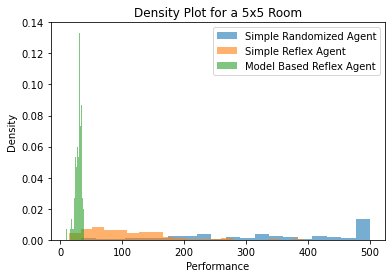

In [17]:
import matplotlib.pyplot as plt
#Repurposed from Graphing Documentation provided by Dr. Hashler in Github
plt.hist(df5["Simple Randomized Agent"], bins = 20, alpha = .6, density=True)
plt.hist(df5["Simple Reflex Agent"], bins = 20, alpha = .6, density=True)
plt.hist(df5["Model Based Reflex Agent"], bins = 20, alpha = .6, density=True)
plt.xlabel("Performance")
plt.ylabel("Density")
plt.legend(labels = ["Simple Randomized Agent", "Simple Reflex Agent", "Model Based Reflex Agent"])
plt.title("Density Plot for a 5x5 Room")
plt.show()

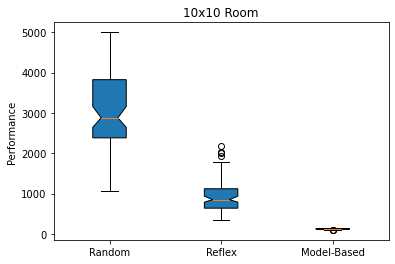

In [18]:
#Repurposed from Graphing Documentation provided by Dr. Hashler in Github
plt.boxplot(df10,
                     notch = True,                 # show 95% confidence intervals around the median
                     bootstrap = 1000,             # used to calculate the notches
                     vert = True,                  # vertical box alignment
                     patch_artist = True,          # fill with color
                     labels = ["Random", "Reflex", "Model-Based"])  # will be used to label x-ticks
plt.ylabel("Performance")
plt.title("10x10 Room")
plt.show()

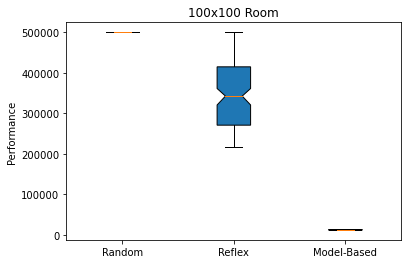

In [19]:
#Repurposed from Graphing Documentation provided by Dr. Hashler in Github
plt.boxplot(df100,
                     notch = True,                 # show 95% confidence intervals around the median
                     bootstrap = 1000,             # used to calculate the notches
                     vert = True,                  # vertical box alignment
                     patch_artist = True,          # fill with color
                     labels = ["Random", "Reflex", "Model-Based"])  # will be used to label x-ticks
plt.ylabel("Performance")
plt.title("100x100 Room")
plt.show()

## Visualization Comparison

When looking at all of the data together instead of just the averages, it is clear to see that the randomized agent is much more likely to take more steps and have a greater spread for smaller rooms. However, this changes when measuring the performance of the 100x100 room. For this room, the reflex agent has much more variance in performance. The random agent was unable to complete the 100x100 room on none of the 100 runs. Lastly, the model-based agent has much more consistent across its 100 runs in all of the enviornments while running much faster than the other agents

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

## Task 5 Answer
* For a rectangular room of unknown size, the random and simple reflex agents would reflect the same pattern as with the square rooms of known size because neither of which would have any knowledge of their location in the room anyway since there is no model being stored. The Model-Based Agent would still out preform both and would continue to use the same process. This tactic would still clean the room in the same pattern and after finding the starting corner, would only travel across each square once unlike that of the random and simple reflex agent
* An irregularly shaped room would require no changes to the random and simple reflex agents. However, this change would require a different implementation of the model-based reflex agent because the room is not consistent across its enviornment. In order to create accurately create a path through the rooms, there would need to be a floor plan made in order to indicate where one room ends and the next one begins when desining the agent. As it stands, an irregularly shaped room may never actually be cleaned due to the structure of the agent as it is while the other two agents will eventually reach every section of the room.
* A room with obstacles would cause major problems for the model-based agent as the percepts only indicate the state of the bumpers, but cannot sense if the reason for the status being true is because of an obstacle or a wall. Because of this, the agent may think that it scanned the entire row when it hits an obstacle which means dirt can continue to be on the other side of the obstacle. Once again this doesn't effect the other two agents as the state of the agent isn't stored by the agent.

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

# Graduate Section Answer

The changes to the simulation enviornment are depicted below in the new function 'simulation_obstacle_enviornment'. The biggest change is that the bumpers are set to true when adjacent to walls and obstacles within the room. In order to differentiate between clean squares, dirty squares, and squares containing obstacles, the matrix is no longer a boolean enviornment, but is now a character based enviornment in which each square is labeled 'C', 'D', and 'O' respectively. The status that is then sent to the agent now requires an extra step in which the character that describes the current location is found instead of a simple boolean value. 

In [20]:
def simulation_obstacle_enviornment(agent, max_steps, size, verbose = False):
    x_location = np.random.choice(size-1)
    y_location = np.random.choice(size-1)
    performance = 0
    
    bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}
    enviornment = np.random.choice(['C', 'D', 'O'], size = (size,size), p=[0.7,0.2,0.1]) #Creates The Initial Room
    
    dirtySquares = np.sum(enviornment == 'D')
    
    steps = 0
    #Sets the bumper statuses for obstacles and walls
    while ((dirtySquares > 0) and (performance < max_steps)):
        if (y_location == 0 or enviornment[x_location][y_location-1] == 'O'):
            bumpers["north"] = True 
        else:
            bumpers["north"] = False
        if (y_location == size-1 or enviornment[x_location][y_location+1] == 'O'):
            bumpers["south"] = True 
        else:
            bumpers["south"] = False
        if(x_location == 0 or enviornment[x_location-1][y_location] == 'O'):
            bumpers["west"] = True
        else: 
            bumpers["west"] = False
        if (x_location == size-1 or enviornment[x_location+1][y_location] == 'O'):
            bumpers["east"] = True
        else:
            bumpers["east"] = False
        
        if(enviornment[x_location][y_location] == 'D'):
            status = True
        else: 
            status = False
        
        action = agent(bumpers, status)
        
        if(verbose): 
            print("Step", performance, "- action: ", action)
        
        if(action == "suck" and enviornment[x_location][y_location] == 'D'): #if a dirty square is cleaned
            dirtySquares -= 1
            enviornment[x_location][y_location] = False
        else:
            if(action == "north"):
                y_location -= 1
            elif(action =="south"):
                y_location += 1
            elif(action =="west"):
                x_location -= 1
            elif(action == "east"):
                x_location += 1
                
        #Handles Out of Bounds for Simple Randomized Agent
        if(x_location < 0):
            if(verbose):
                print("Hit Wall - Same Position")
            x_location += 1
        elif(x_location == size):
            if(verbose):
                print("Hit Wall - Same Position")
            x_location -= 1
        elif(y_location < 0):
            if(verbose):
                print("Hit Wall - Same Position")
            y_location += 1
        elif(y_location == size):
            if(verbose):
                print("Hit Wall - Same Position")
            y_location -= 1
            
        performance += 1
        
    return performance

In [21]:
#Set up 100 tests for 5x5 matrix
n_max = 100
max_steps = 500
size = 5
arr5 = []
for i in range(n_max):
    steps = {
    "Simple Randomized Agent":simulation_obstacle_enviornment(simple_randomized_agent, max_steps, size),
    "Simple Reflex Agent":simulation_obstacle_enviornment(simple_reflex_agent,max_steps, size),
    "Model Based Reflex Agent":simulation_obstacle_enviornment(model_reflex_agent().actions, max_steps, size)
    }
    arr5.append(steps)
obsdf5 = pd.DataFrame(arr5)

In [27]:
#Set up 100 tests for 5x5 matrix
n_max = 100
max_steps = 5000
size = 10
arr10 = []
for i in range(n_max):
    steps = {
    "Simple Randomized Agent":simulation_obstacle_enviornment(simple_randomized_agent, max_steps, size),
    "Simple Reflex Agent":simulation_obstacle_enviornment(simple_reflex_agent,max_steps, size),
    "Model Based Reflex Agent":simulation_obstacle_enviornment(model_reflex_agent().actions, max_steps, size)
    }
    arr10.append(steps)
obsdf10 = pd.DataFrame(arr10)

In [29]:
n_max = 100
max_steps = 500000
size = 100
arr100 = []
for i in range(n_max):
    steps = {
    "Simple Randomized Agent":simulation_obstacle_enviornment(simple_randomized_agent, max_steps, size),
    "Simple Reflex Agent":simulation_obstacle_enviornment(simple_reflex_agent,max_steps, size),
    "Model Based Reflex Agent":simulation_obstacle_enviornment(model_reflex_agent().actions, max_steps, size)
    }
    arr100.append(steps)
obsdf100 = pd.DataFrame(arr100)
obsdf100

,Simple Randomized Agent,Simple Reflex Agent,Model Based Reflex Agent
0,500000,500000,500000
1,500000,424958,500000
2,500000,500000,500000
3,500000,373919,500000
4,500000,500000,500000
...,...,...,...
95,500000,488682,500000
96,500000,328885,500000
97,500000,500000,500000
98,500000,500000,500000


In [33]:
averages = {"Size" : ["5x5","10x10","100x100"],
             "Simple Randomized Agent" : [obsdf5["Simple Randomized Agent"].mean(), 
                                          obsdf10["Simple Randomized Agent"].mean(), 
                                          obsdf100["Simple Randomized Agent"].mean()],
             "Simple Reflex Agent" : [obsdf5["Simple Reflex Agent"].mean(), 
                                      obsdf10["Simple Reflex Agent"].mean(),  
                                      obsdf100["Simple Reflex Agent"].mean()],
            "Model Based Reflex Agent" : [obsdf5["Model Based Reflex Agent"].mean(), 
                                          obsdf10["Model Based Reflex Agent"].mean(),  
                                          obsdf100["Model Based Reflex Agent"].mean()]
            }
dfAverages = pd.DataFrame(averages)
dfAverages

,Size,Simple Randomized Agent,Simple Reflex Agent,Model Based Reflex Agent
0,5x5,369.68,107.78,252.84
1,10x10,2909.88,1011.64,4951.04
2,100x100,500000.00,437612.01,500000.00


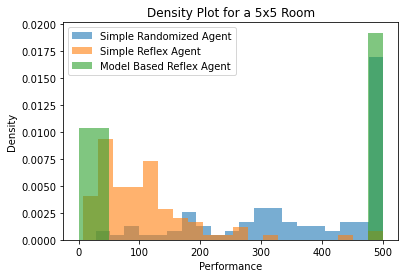

In [34]:
#Repurposed from Graphing Documentation provided by Dr. Hashler in Github
plt.hist(obsdf5["Simple Randomized Agent"], bins = 20, alpha = .6, density=True)
plt.hist(obsdf5["Simple Reflex Agent"], bins = 20, alpha = .6, density=True)
plt.hist(obsdf5["Model Based Reflex Agent"], bins = 20, alpha = .6, density=True)
plt.xlabel("Performance")
plt.ylabel("Density")
plt.legend(labels = ["Simple Randomized Agent", "Simple Reflex Agent", "Model Based Reflex Agent"])
plt.title("Density Plot for a 5x5 Room")
plt.show()

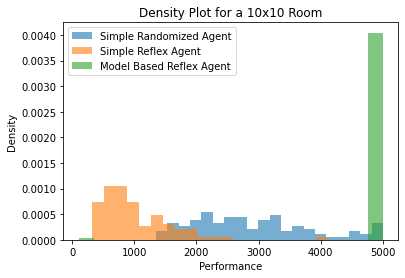

In [36]:
#Repurposed from Graphing Documentation provided by Dr. Hashler in Github
plt.hist(obsdf10["Simple Randomized Agent"], bins = 20, alpha = .6, density=True)
plt.hist(obsdf10["Simple Reflex Agent"], bins = 20, alpha = .6, density=True)
plt.hist(obsdf10["Model Based Reflex Agent"], bins = 20, alpha = .6, density=True)
plt.xlabel("Performance")
plt.ylabel("Density")
plt.legend(labels = ["Simple Randomized Agent", "Simple Reflex Agent", "Model Based Reflex Agent"])
plt.title("Density Plot for a 10x10 Room")
plt.show()

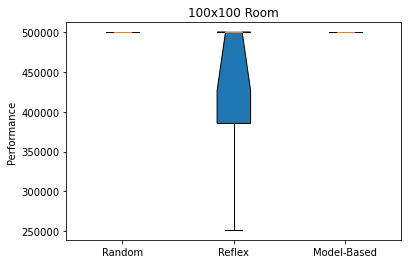

In [39]:
plt.boxplot(obsdf100,
                     notch = True,                 # show 95% confidence intervals around the median
                     bootstrap = 1000,             # used to calculate the notches
                     vert = True,                  # vertical box alignment
                     patch_artist = True,          # fill with color
                     labels = ["Random", "Reflex", "Model-Based"])  # will be used to label x-ticks
plt.ylabel("Performance")
plt.title("100x100 Room")
plt.show()

## Graduate Experimentation
The addition of obstacles to the enviornment altered the results drastically for the model based agent because the agent is designed with a structure in mind. Without the enviornment being a match for the initial design, it is difficult for the agent to create an accurate model of the enviornment. Furthermore, the model relies on crossing rows unimpeded and being able to reach the Northeastern corner of the room before cleaning. This ideal situation would not be possible with the current design if an obstacle stopped the agent on is way to the starting corner.

The addition of obstacles also adds more delays for the randomized agent as the agent is now more likley to move in the direction of an obstacle rather than just running into a wall. This means that the already bad performing agent could only perform worse. In this situation, the simple reflex agent thrives were the other two agents fail because this agent is much more versatile and comparatively is more intelligent by design because the agent will always act rational while also not being restricted by a desired model.

It is important to note that when the model-based agent completes cleaning the agent will outpreform the other agents, but it is much more likely to have the model-based agent not complete cleaning the room as seen in the 5x5 room density graph. Furthermore, the largest room results in neither the random nor model-based agent being able to complete the task, but the reflex agent having a significant amount of instances in which the room can be cleaned.

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code